## Практическое задание 6. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data).  

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Загрузка данных
data = pd.read_csv('application_train.csv')

# Запись целевой переменной
Y = data['TARGET']

# Удаление ненужных столбцов
drop_columns = ['SK_ID_CURR', 'TARGET']  # названия ненужных столбцов
data = data.drop(drop_columns, axis=1)

# Выбор столбцов разного типа 
numerical_columns = data.select_dtypes(include=['int'])
object_columns = data.select_dtypes(include=['object'])
float_columns = data.select_dtypes(include=['float64'])

# Заполнение пропусков в столбцах 
data[numerical_columns.columns] = numerical_columns.fillna(0)
data[object_columns.columns] = object_columns.fillna('')
data[float_columns.columns] = float_columns.fillna(0.)

#data_v = data.loc[:, data.dtypes != object]
#num_columns = data_v.columns

# Разделение выборки
#X_train, X_test, Y_train, Y_test = train_test_split(np.array(data_v), Y, test_size=0.3, random_state=0)

data.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
for c in data.columns:
    col_type = data[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        data[c] = data[c].astype('category')
        
index = data.select_dtypes(include=['float64', 'int64']).columns
num = data[index]
index = data.select_dtypes(include=['category']).columns
categorical = data[index]

__Задание 2. (1.5 балла)__

Также мы будем использовать две реализации градиентного бустинга: [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-API.html) и [Catboost](https://catboost.ai/en/docs/), которые вам необходимо самостоятельно изучить и установить, используя команды:  
`!pip install lightgb`  
`!pip install catboost`  
Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров. 
Почему получилась заметная разница в качестве? 

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [4]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import average_precision_score
from time import time

In [42]:
data1 = [[0,0,0, 0], 
        [0,0,0, 0]]

In [61]:
# Обучение LightGBM
startL = time()
lgbm_model = LGBMClassifier(verbose=-100)
lgbm_model.fit(X_train, Y_train)
lgbm_pred = lgbm_model.predict_proba(X_test)[:,1]
lgbm_score = average_precision_score(Y_test, lgbm_pred)
endL = time() - startL

# Обучение Catboost
startC = time()
catboost_model = CatBoostClassifier(logging_level='Silent')
catboost_model.fit(X_train, Y_train)
catboost_pred = catboost_model.predict_proba(X_test)[:,1]
catboost_score = average_precision_score(Y_test, catboost_pred)
endC = time() - startC

data1[0][0] = lgbm_score
data1[1][0] = catboost_score
lgbm_proba=lgbm_pred
catboost_proba=catboost_pred
print(f"Average Precision Score for LightGBM: {lgbm_score}")
print('Время обучения модели',endL)
print(f"Average Precision Score for Catboost: {catboost_score}")
print(endC)


Average Precision Score for LightGBM: 0.23159230793933588
Время обучения модели 1.7484638690948486
Average Precision Score for Catboost: 0.23308641845236597
36.48519492149353


CatBoost, как правило, хорошо работает уже «из коробки» без утомительной настройки гиперпараметров.

__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

In [6]:
from sklearn.model_selection import GridSearchCV

# Подбор параметров LightGBM
lgbm_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.2, 0.5],
    'objective': ['binary']#целевая функция, которую мы используем в задаче. по умолчанию - regression
}

lgbm_grid = GridSearchCV(LGBMClassifier(verbose=-100), lgbm_param_grid, scoring='average_precision', cv=3)
startL = time()
lgbm_grid.fit(X_train, Y_train)
best_lgbm_model = lgbm_grid.best_estimator_
endL = time() - startL

#Подбор параметров Catboost
catboost_param_grid = {
   'depth': [3, 5, 7],
   'iterations': [50, 100, 200],
   'learning_rate': [0.01, 0.2, 0.5],
   'loss_function': ['Logloss']
}

catboost_grid = GridSearchCV(CatBoostClassifier(logging_level='Silent'), catboost_param_grid, scoring='average_precision', cv=3)
startC = time()
catboost_grid.fit(X_train, Y_train)
best_catboost_model = catboost_grid.best_estimator_
endC = time() - startC

print("Best parameters for LightGBM:", lgbm_grid.best_params_)
print('Время обучения', endL)
print("Best parameters for Catboost:", catboost_grid.best_params_)
print('Время обучения', endC)


Best parameters for LightGBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary'}
Время обучения 88.45845413208008
Best parameters for Catboost: {'depth': 3, 'iterations': 200, 'learning_rate': 0.2, 'loss_function': 'Logloss'}
Время обучения 762.7238638401031


__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов. 

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков. 

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [69]:
# Примените OHE кодирование
cols=data.select_dtypes(include=['object'])
ohe_encoder = OneHotEncoder()  # Укажите категориальные столбцы

#X_train_ohe = ohe_encoder.fit_transform(X_train)
#X_test_ohe = ohe_encoder.transform(X_test)
encoder_df = pd.DataFrame(ohe_encoder.fit_transform(cols).toarray())
df_ohe = data_v.join(encoder_df)

In [70]:
df_ohe

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,136,137,138,139,140,141,142,143,144,145
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,-1982,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,-4090,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,-5150,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,-931,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(df_ohe), Y, test_size=0.3, random_state=0)

In [72]:
# Подбор параметров LightGBM
lgbm_param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.2, 0.5],
    'objective': ['binary']#целевая функция, которую мы используем в задаче. по умолчанию - regression
}

lgbm_grid = GridSearchCV(LGBMClassifier(verbose=-100), lgbm_param_grid, scoring='average_precision', cv=3)
startL = time()
lgbm_grid.fit(X_train, Y_train)
best_lgbm_model = lgbm_grid.best_estimator_
endL = time() - startL

#Подбор параметров Catboost
catboost_param_grid = {
   'depth': [3, 5, 7],
   'iterations': [50, 100, 200],
   'learning_rate': [0.01, 0.2, 0.5],
   'loss_function': ['Logloss']
}

catboost_grid = GridSearchCV(CatBoostClassifier(logging_level='Silent'), catboost_param_grid, scoring='average_precision', cv=3)
startC = time()
catboost_grid.fit(X_train, Y_train)
best_catboost_model = catboost_grid.best_estimator_
endC = time() - startC

print("Best parameters for LightGBM:", lgbm_grid.best_params_)
print('Время обучения', endL)
print("Best parameters for Catboost:", catboost_grid.best_params_)
print('Время обучения', endC)


Best parameters for LightGBM: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary'}
Время обучения 122.40975403785706
Best parameters for Catboost: {'depth': 3, 'iterations': 200, 'learning_rate': 0.2, 'loss_function': 'Logloss'}
Время обучения 1356.4134290218353


In [73]:
# Обучение LightGBM
startL = time()
lgbm_model = LGBMClassifier(verbose=-100,max_depth=3,n_estimators=200,learning_rate=0.2, objective='binary')
lgbm_model.fit(X_train, Y_train)
lgbm_pred = lgbm_model.predict_proba(X_test)[:,1]
lgbm_score = average_precision_score(Y_test, lgbm_pred)
endL = time() - startL

# Обучение Catboost
startC = time()
catboost_model = CatBoostClassifier(logging_level='Silent',depth=3 , iterations=200 , learning_rate=0.2 , loss_function='Logloss' )
catboost_model.fit(X_train, Y_train)
catboost_pred = catboost_model.predict_proba(X_test)[:,1]
catboost_score = average_precision_score(Y_test, catboost_pred)
endC = time() - startC

data1[0][1]=lgbm_score
data1[1][1]= catboost_score
lgbm_proba_oh=lgbm_pred
catboost_proba_oh = catboost_pred
print(f"Average Precision Score for LightGBM: {lgbm_score}")
print('Время обучения модели',endL)
print(f"Average Precision Score for Catboost: {catboost_score}")
print(endC)

Average Precision Score for LightGBM: 0.2370668662389143
Время обучения модели 1.9901881217956543
Average Precision Score for Catboost: 0.23553142503937663
20.600156784057617


На подобранных параметрах и OHE точность стала лучше.

Встроенные методы обработки категориальных признаков

In [76]:
cat_labels = np.array(categorical.columns)
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.3, random_state=0)

startL = time()
lgbm = LGBMClassifier(verbose=-100, categorical_feature=cat_labels,max_depth=3,n_estimators=200,learning_rate=0.2, objective='binary')
lgbm_model.fit(X_train, Y_train)
lgbm_pred = lgbm_model.predict_proba(X_test)[:,1]
lgbm_score = average_precision_score(Y_test, lgbm_pred)
endL = time() - startL

data1[0][2]=lgbm_score
lgbm_proba_cat=lgbm_pred
print(f"Average Precision Score for LightGBM: {lgbm_score}")
print('Время обучения модели',endL)

Average Precision Score for LightGBM: 0.23558357626686266
Время обучения модели 2.541539192199707


In [77]:
# Обучение Catboost
startC = time()
catboost_model = CatBoostClassifier(logging_level='Silent',depth=3 , iterations=200 , learning_rate=0.2 , loss_function='Logloss' )
catboost_model.fit(X_train, Y_train,cat_features=cat_labels)
catboost_pred = catboost_model.predict_proba(X_test)[:,1]
catboost_score = average_precision_score(Y_test, catboost_pred)
endC = time() - startC

data1[1][2]=catboost_score
catboost_proba_cat = catboost_pred
print(f"Average Precision Score for Catboost: {catboost_score}")
print(endC)



Average Precision Score for Catboost: 0.23634545762690903
13.669656038284302


In [ ]:
Где-то качество чуть упало(Lgbm), по сравнению с OHE, а на cat стала выше.
Но в люом случае везде больше, чем было до.
Что касается времени, Lgbm обучается медленнее, а CATBOOST быстрее. 

__Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [78]:
lgbm_blend= (lgbm_proba + lgbm_proba_oh + lgbm_proba_cat)/3
cat_blend=(catboost_proba + catboost_proba_oh + catboost_proba_cat)/3
data1[0][3]=average_precision_score(y_test, lgbm_blend)
data1[1][3]=average_precision_score(y_test, cat_blend)
df = pd.DataFrame(index=['LGBM','CATBOOST'], columns = ['real','real+oh','real+cat','blending'])
for i in range(2):
    for j in range(4):
        df.iloc[i,j] = data1[i][j]
df

,real,real+oh,real+cat,blending
LGBM,0.231592,0.237067,0.235584,0.239712
CATBOOST,0.233086,0.235531,0.236345,0.240379


__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

In [151]:
import matplotlib.pyplot as plt
X_train, X_test, Y_train, Y_test = train_test_split(num, Y, test_size=0.3, random_state=0)

Text(0.5, 1.0, 'Lightgbm')

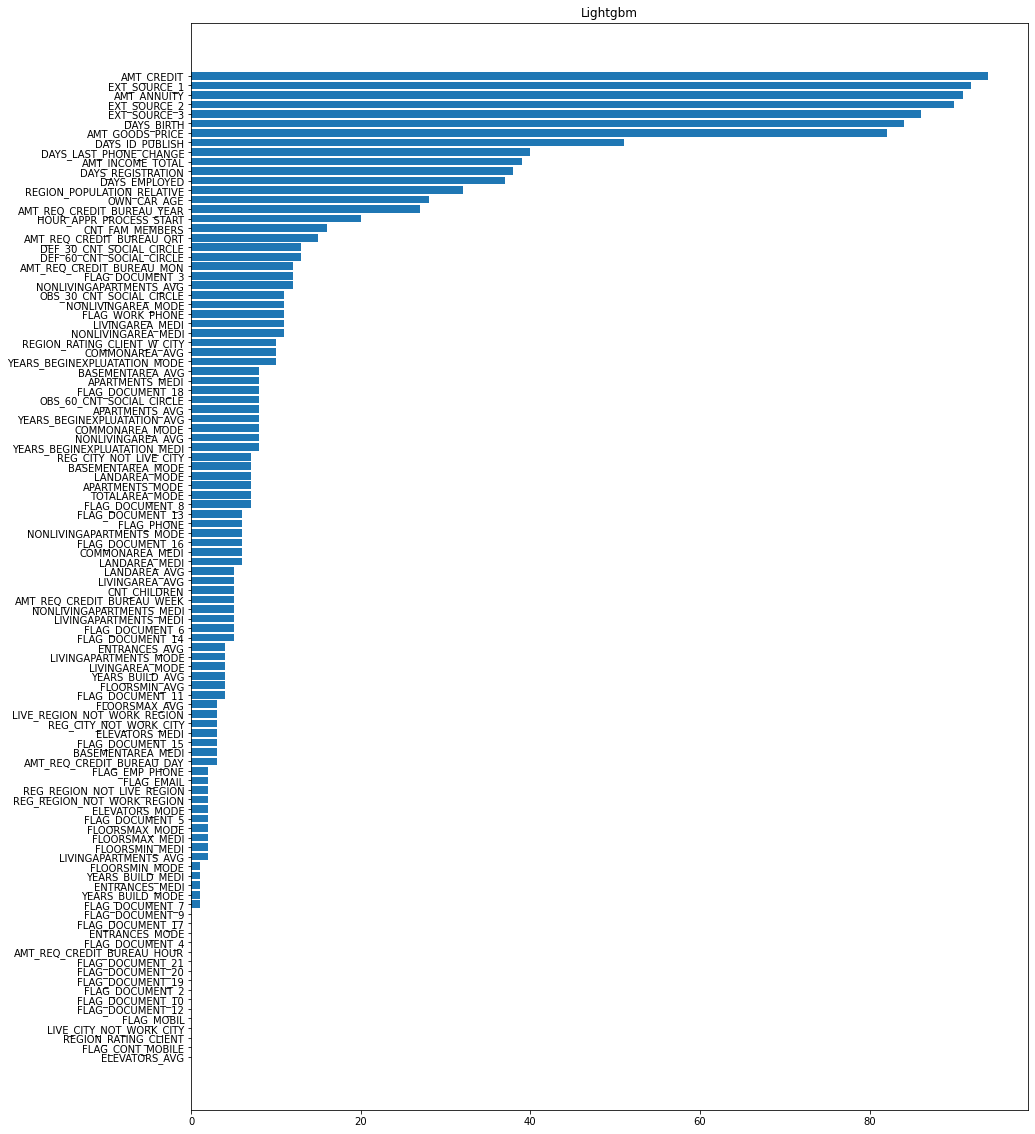

In [152]:
lgbm = LGBMClassifier(verbose=-100, max_depth=3,n_estimators=200,learning_rate=0.2, objective='binary')
lgbm.fit(X_train, Y_train)

important_features = lgbm.feature_importances_
index = np.argsort(important_features)
important_features = important_features[index]
features_lgbm_labels = np.array(numeric.columns[index])

fig = plt.figure(figsize=(15, 20))
plt.barh(range(len(index)), important_features)
plt.yticks(range(len(index)), features_lgbm_labels)
plt.title('Lightgbm')

In [153]:
features_lgbm_labels=features_lgbm_labels[70:]
print(len(np.array(features_lgbm_labels)))
Ximportant = num[features_lgbm_labels]
X_train, X_test, y_train, y_test = train_test_split(Ximportant, Y, test_size=0.3, random_state=0)
startL = time()
lgbm_model.fit(X_train, Y_train)
lgbm_pred = lgbm_model.predict_proba(X_test)[:,1]
lgbm_score = average_precision_score(Y_test, lgbm_pred)
endL = time() - startL

print(f"Average Precision Score for LightGBM: {lgbm_score}")
print('Время обучения модели',endL)

34
Average Precision Score for LightGBM: 0.23337937944743045
Время обучения модели 1.2437446117401123


Text(0.5, 1.0, 'Catboost')

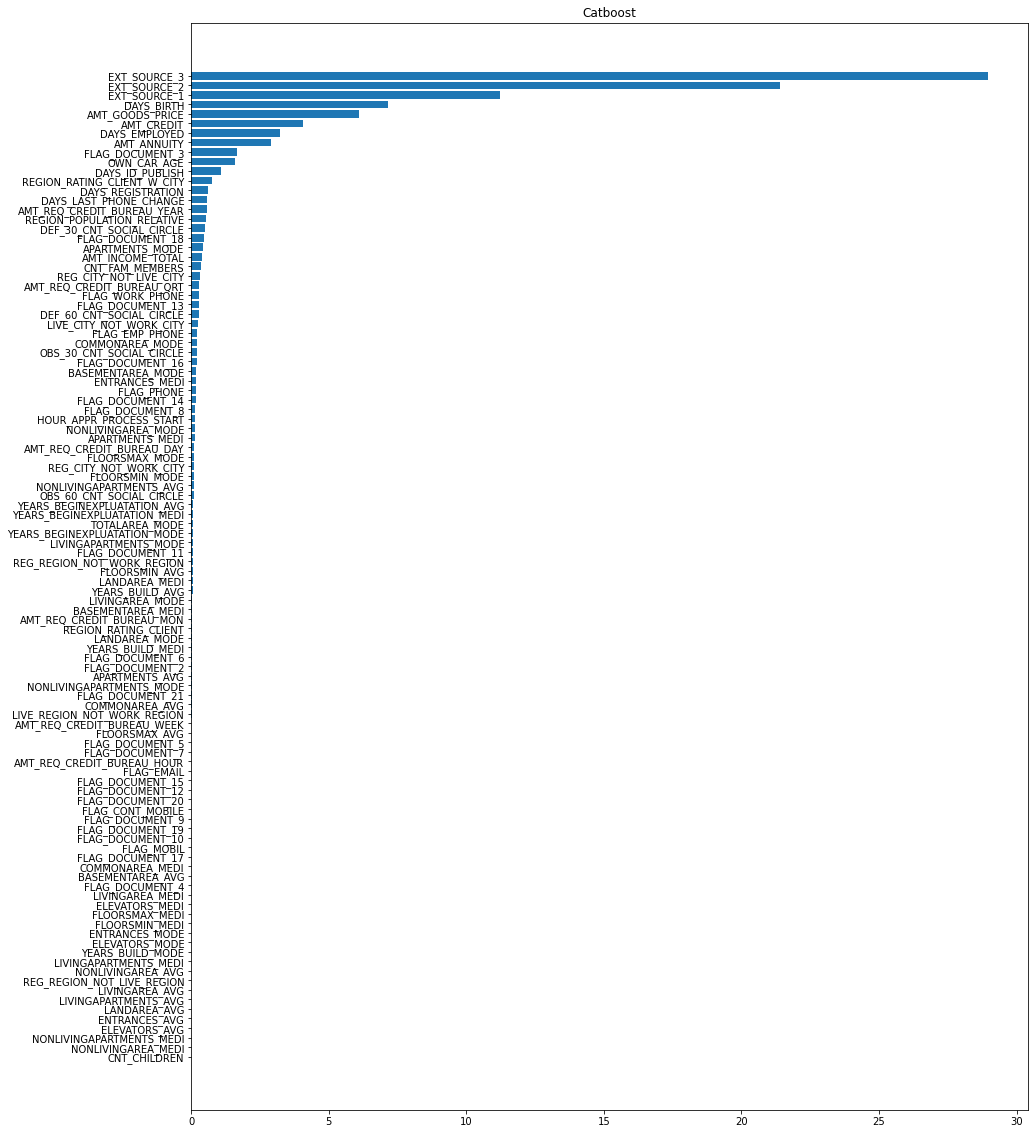

In [154]:
X_train, X_test, Y_train, Y_test = train_test_split(num, Y, test_size=0.3, random_state=0)
catboost_model = CatBoostClassifier(logging_level='Silent',depth=3 , iterations=200 , learning_rate=0.2 , loss_function='Logloss' )

catboost_model.fit(X_train, Y_train)

important_features = catboost_model.feature_importances_
index = np.argsort(important_features)
important_features = important_features[index]
features_cat_labels = np.array(num.columns[index])

fig = plt.figure(figsize=(15, 20))
plt.barh(range(len(index)), important_features)
plt.yticks(range(len(index)), features_cat_labels)
plt.title('Catboost')

In [155]:
features_cat_labels = features_cat_labels[70:]
print(len(np.array(features_cat_labels)))
Ximportant = num[features_cat_labels]
X_train, X_test, Y_train, Y_test = train_test_split(Ximportant, Y, test_size=0.3, random_state=0)
startL = time()
catboost_model.fit(X_train, Y_train)
catboost_pred = catboost_model.predict_proba(X_test)[:,1]
catboost_score = average_precision_score(Y_test, catboost_pred)
endL = time() - startL

print(f"Average Precision Score for LightGBM: {catboost_score}")
print('Время обучения модели',endL)

34
Average Precision Score for LightGBM: 0.23222769701668322
Время обучения модели 3.4734411239624023


Качество упало, но не сильно!

УРААААААААА